In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [2]:
imagesize = 512
batchsize = 32
epochs = 37
channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Training",
    shuffle=True,
    image_size=(imagesize,imagesize),
    batch_size=batchsize
)

Found 5712 files belonging to 4 classes.


In [4]:
dataset.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

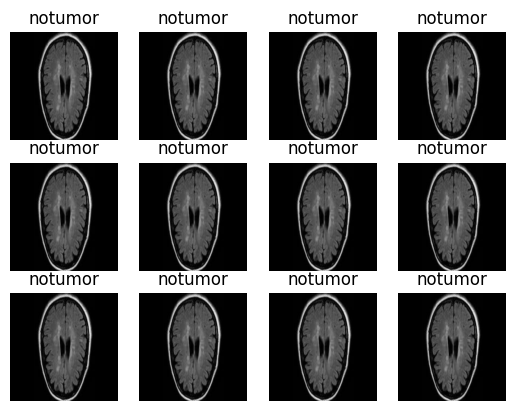

In [5]:
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[0].numpy().astype('uint8'))
    
        plt.title(dataset.class_names[label_batch[0]])
    
        plt.axis('off')
    

In [6]:
len(dataset)*0.8

143.20000000000002

In [7]:
train_ds = dataset.take(143)
len(train_ds)

143

In [8]:
test_ds = dataset.skip(143)
len(test_ds)

36

In [9]:
len(test_ds)*0.1

3.6

In [10]:
val_ds = test_ds.take(4)
len(val_ds)

4

In [11]:
test_ds = test_ds.skip(4)
len(test_ds)

32

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
resizeandrescale = tf.keras.Sequential([
tf.keras.layers.experimental.preprocessing.Resizing(256,256),
tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:
input_shape = (batchsize,imagesize,imagesize,channels)
model = tf.keras.models.Sequential([
    resizeandrescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [16]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history  = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=batchsize,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/37


143/143 [==============================] - 147s 874ms/step - loss: 1.0363 - accuracy: 0.5529 - val_loss: 0.8015 - val_accuracy: 0.6719
Epoch 2/37
143/143 [==============================] - 112s 783ms/step - loss: 0.7428 - accuracy: 0.7120 - val_loss: 0.5857 - val_accuracy: 0.7734
Epoch 3/37
143/143 [==============================] - 111s 774ms/step - loss: 0.6371 - accuracy: 0.7609 - val_loss: 0.5451 - val_accuracy: 0.7812
Epoch 4/37
143/143 [==============================] - 111s 775ms/step - loss: 0.6078 - accuracy: 0.7714 - val_loss: 0.5286 - val_accuracy: 0.7734
Epoch 5/37
143/143 [==============================] - 111s 776ms/step - loss: 0.5315 - accuracy: 0.7983 - val_loss: 0.5477 - val_accuracy: 0.8359
Epoch 6/37
143/143 [==============================] - 110s 770ms/step - loss: 0.5186 - accuracy: 0.8029 - val_loss: 0.4215 - val_accuracy: 0.8750
Epoch 7/37
143/143 [==============================] - 108s 756ms/step - loss: 0.4478 - accuracy: 0.8285 - val_loss: 0.3436 - val_accura

In [19]:
scores = model.evaluate(test_ds)

32/32 [==============================] - 14s 192ms/step - loss: 0.2014 - accuracy: 0.9444


In [20]:
scores

[0.2013942301273346, 0.9444444179534912]

In [23]:
test1_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Testing',
    shuffle=True,
    batch_size=32,
    image_size=(imagesize,imagesize),
    
)

Found 1311 files belonging to 4 classes.


In [24]:
test1_ds.class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [25]:
scores1 = model.evaluate(test1_ds)

41/41 [==============================] - 8s 177ms/step - loss: 0.2375 - accuracy: 0.9321


In [26]:
scores1

[0.23752637207508087, 0.9321128726005554]

In [27]:
history

In [30]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

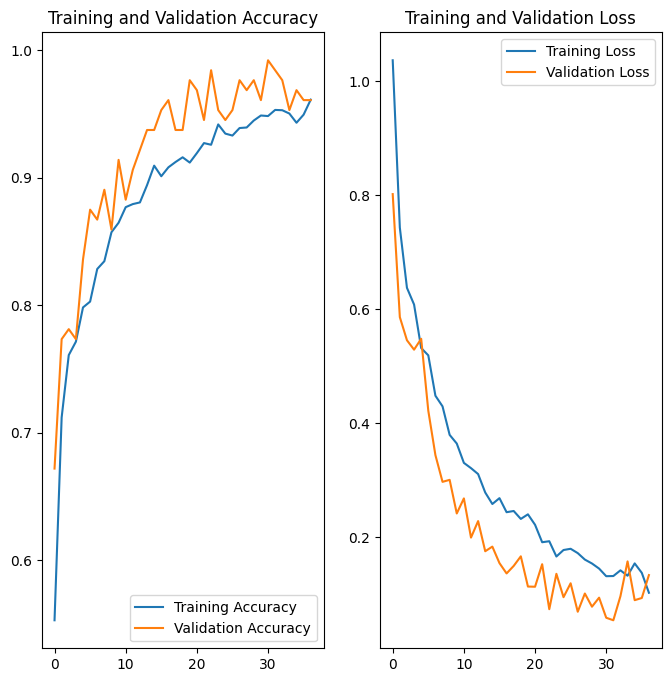

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),accuracy,label = "Training Accuracy")
plt.plot(range(epochs),val_acc,label = "Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label = "Training Loss")
plt.plot(range(epochs),val_loss,label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [41]:
import os
model_version = max([int(i) for i in os.listdir("../model/")])+1
model.save(f"../model/{model_version}")

INFO:tensorflow:Assets written to: ../model/2\assets


INFO:tensorflow:Assets written to: ../model/2\assets
